# Analyzing Facebook Friends Graph Data


In [0]:
# Necessary imports
!pip install networkx
import networkx as nx
import matplotlib.pyplot as plt
from urllib import request
import community
import numpy as np
import os
import gzip
import shutil

## Loading the Facebook Dataset
 
We will use the [Stanford Facebook graph dataset](https://snap.stanford.edu/data/facebook_combined.txt.gz) which is publicly hosted in [this webpage](https://snap.stanford.edu/data/egonets-Facebook.html) and has a description of the files available [here](https://snap.stanford.edu/data/readme-Ego.txt). The dataset contains information from 10 different individuals.

Our objective is to use this network information to build a friend recommender system.

First, we need to load the dataset into the notebook.

In [0]:
link = 'https://snap.stanford.edu/data/facebook_combined.txt.gz'
base_path = '/content/'

with request.urlopen(link) as r, open(os.path.join(base_path, "facebook_combined.txt.gz"), 'wb') as f:
  f.write(r.read())

with gzip.open('facebook_combined.txt.gz', 'rb') as f_in:
    with open('facebook_combined.txt', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

Then we initialize the graph using the NetworkX library.

In [0]:
# Read dataset file and load graph
G_fb = nx.read_edgelist("/content/facebook_combined.txt", create_using = nx.Graph(), nodetype=int)

## General Overlay of our Graph

We can now plot the loaded graph.

(-0.9797722876071928,
 0.9440670788288115,
 -0.6158012717962265,
 1.0769429177045822)

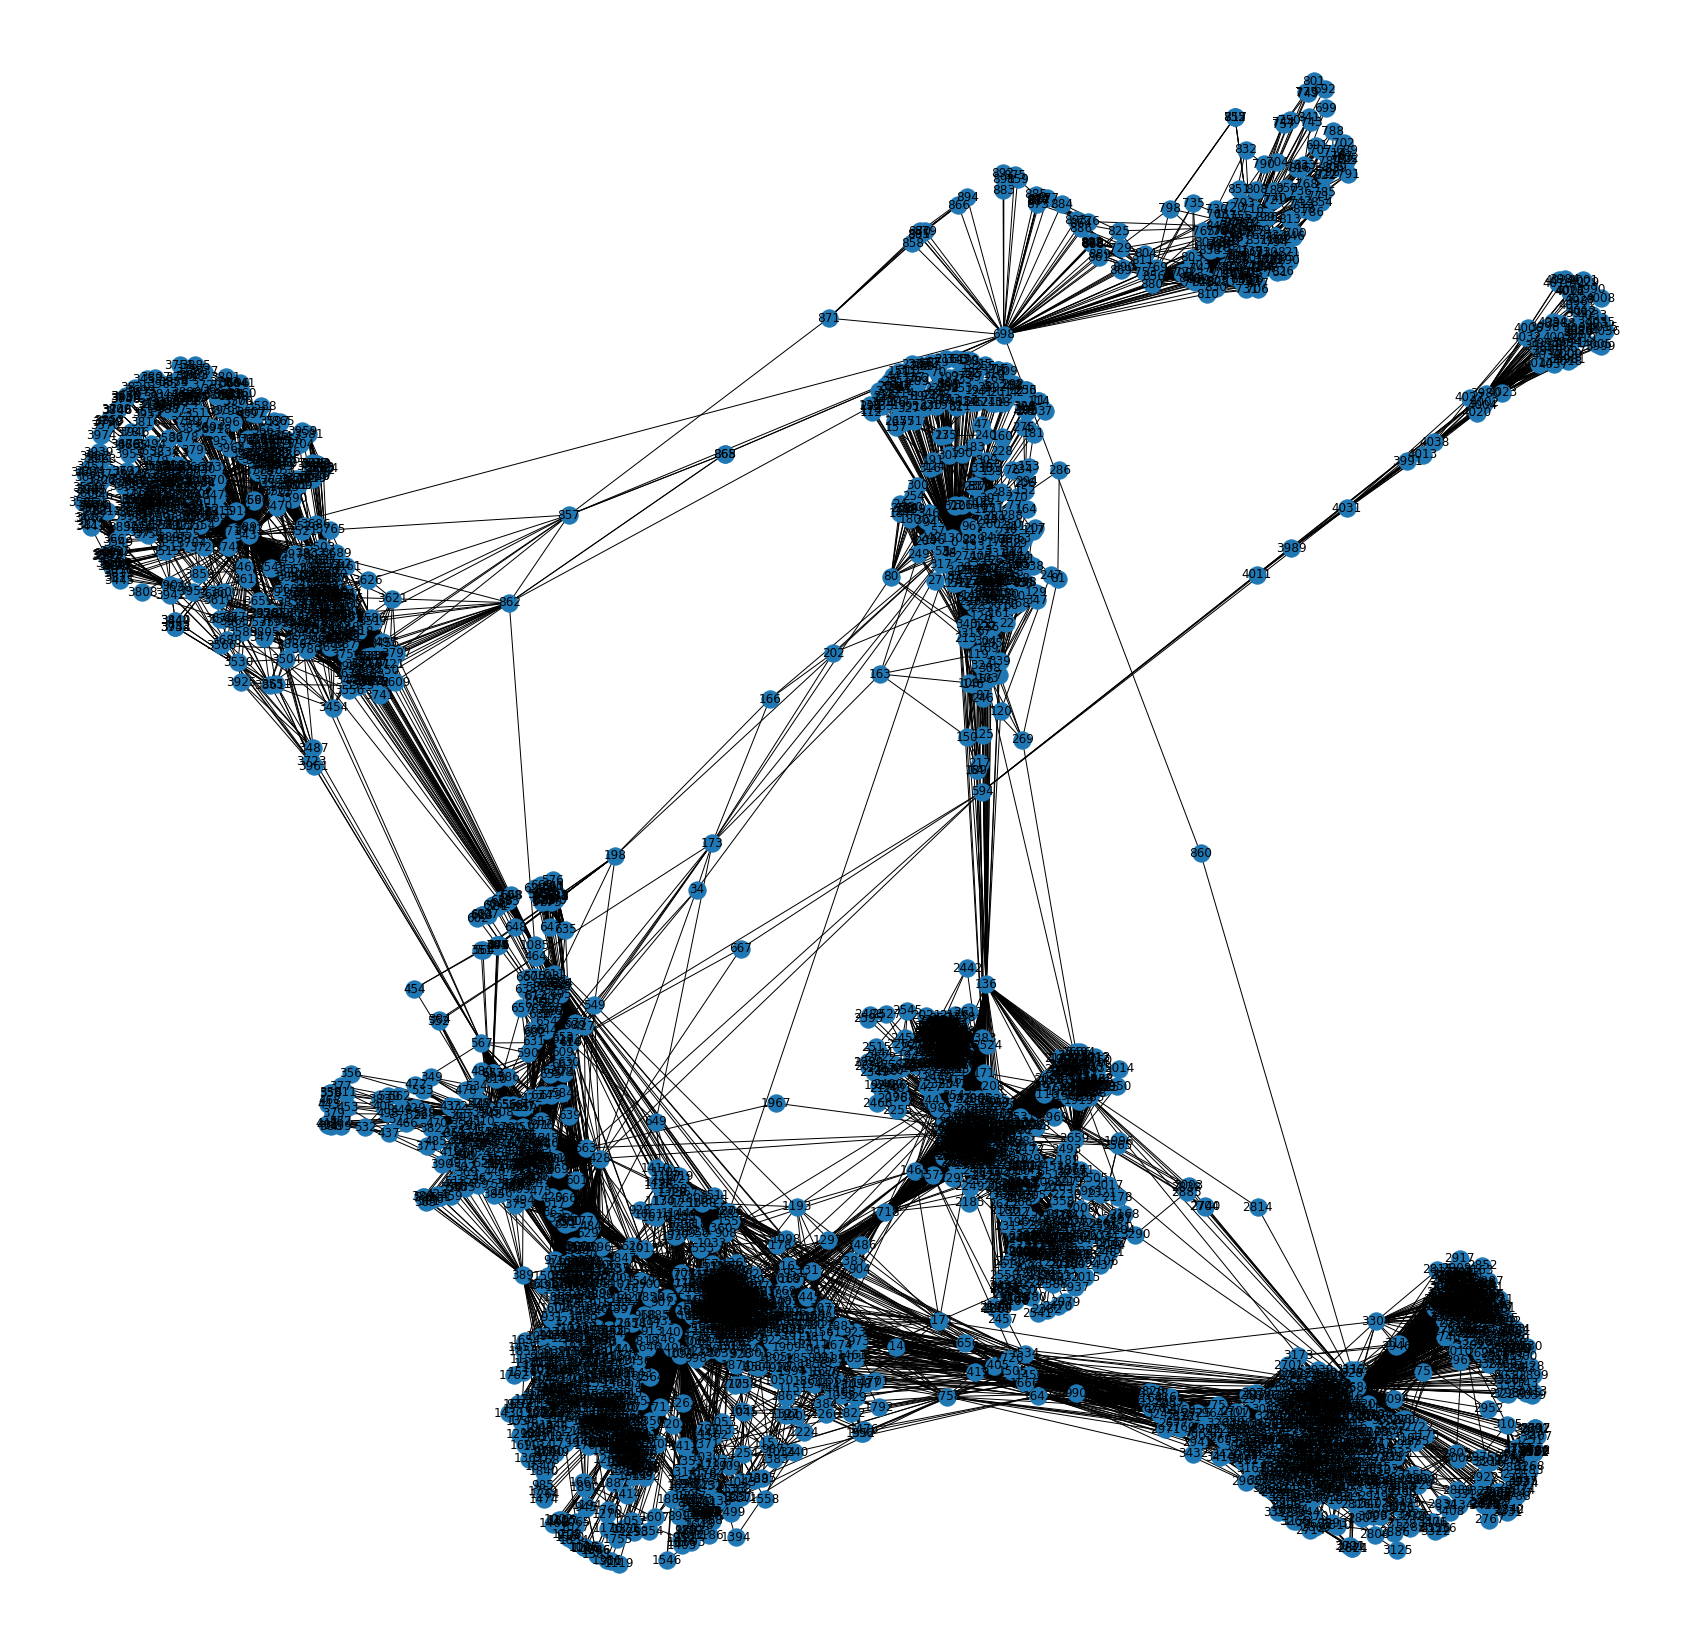

(-1.0998897701501846,
 1.0976851731538773,
 -0.9355758488178253,
 0.6757668316364288)

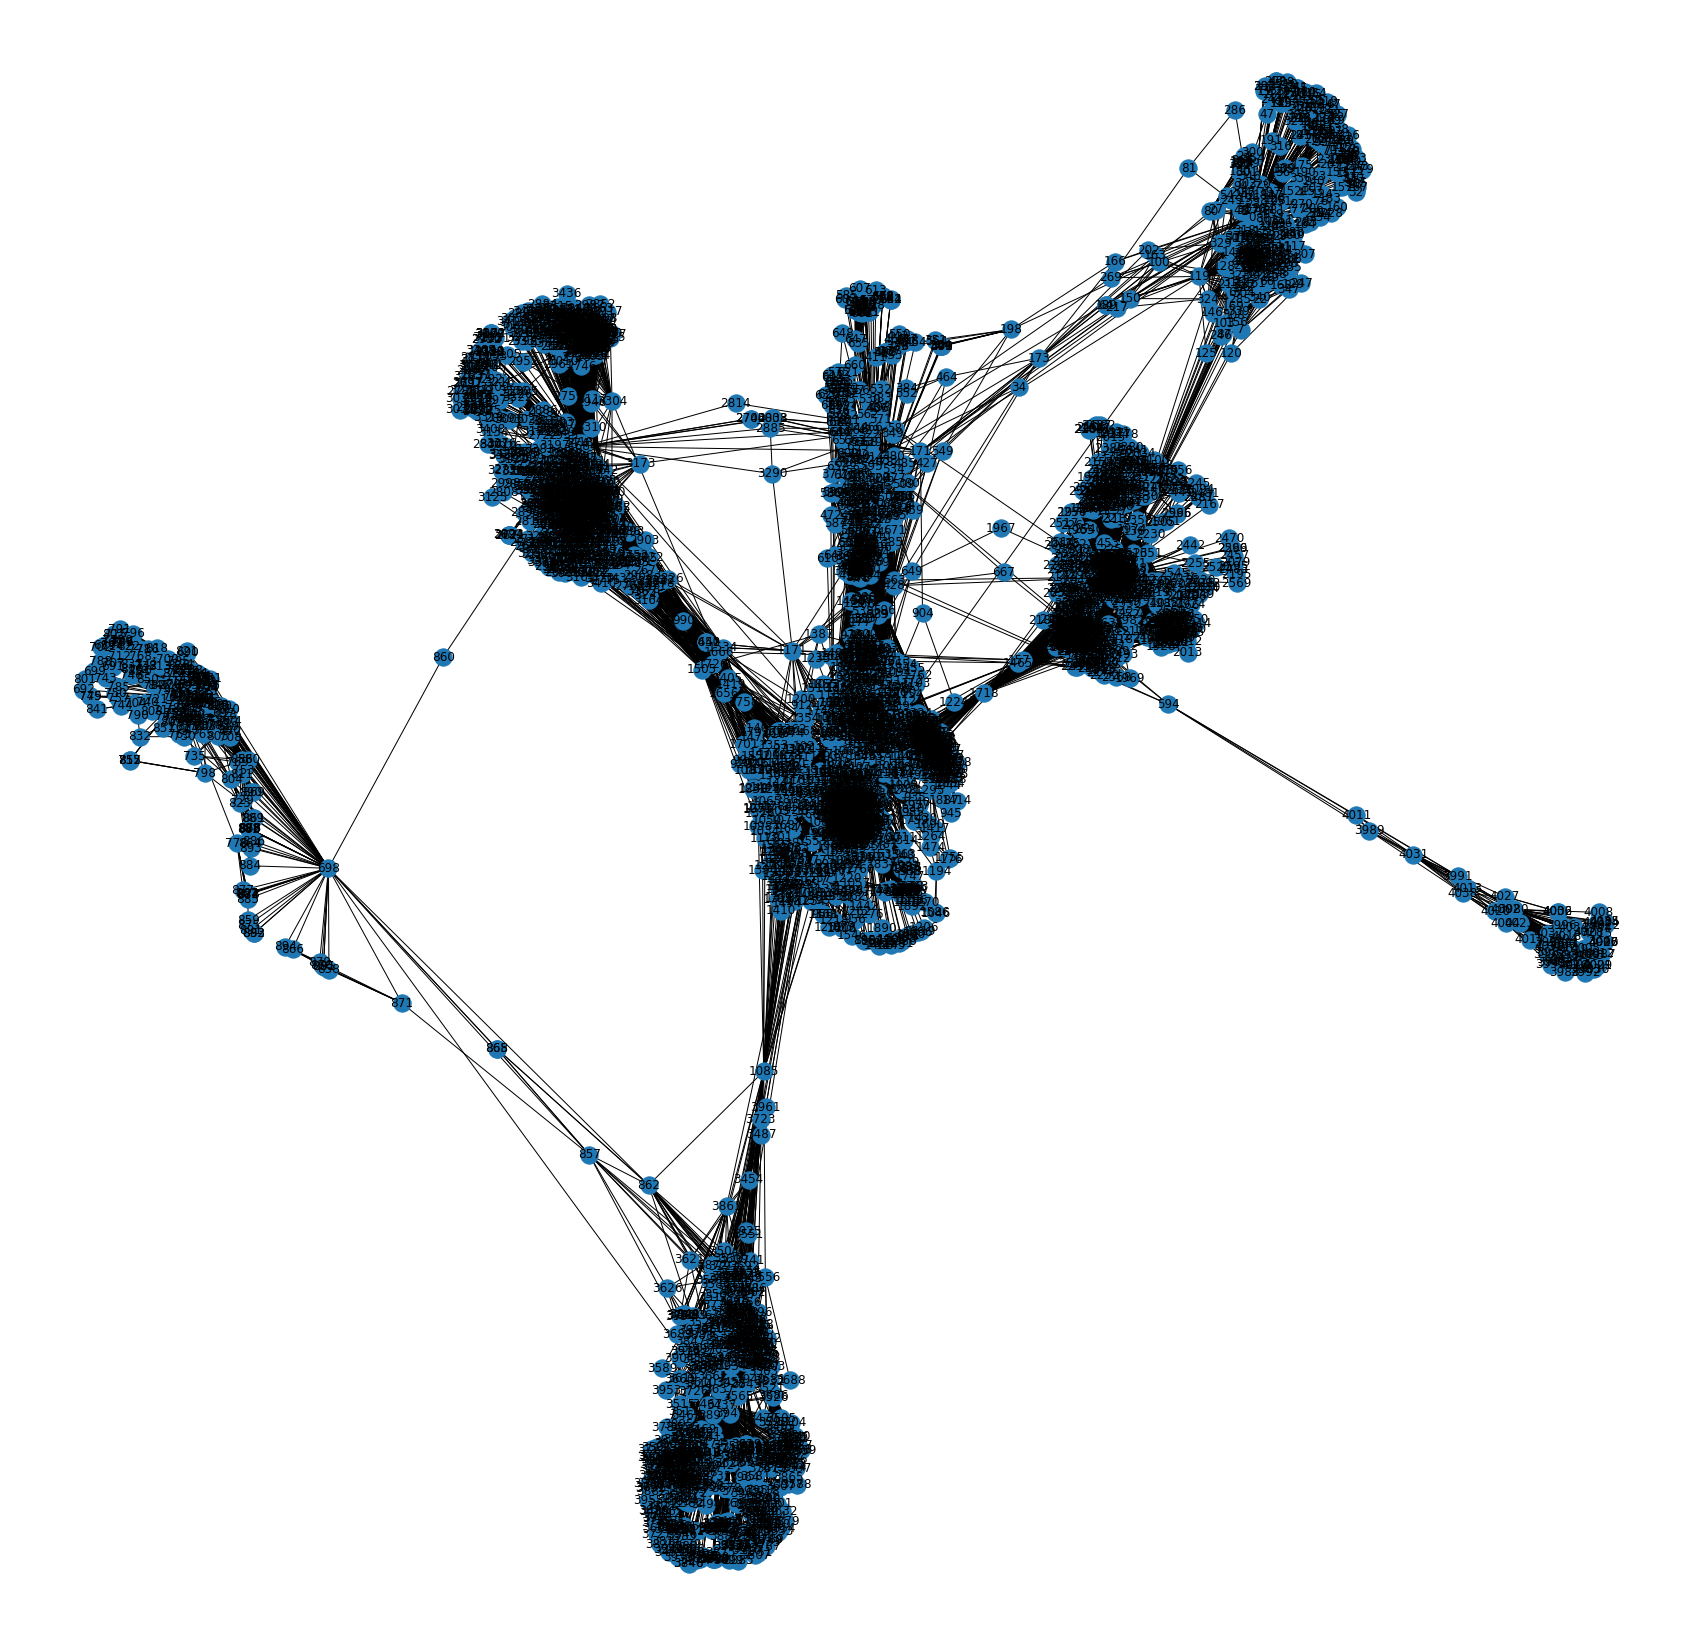

In [0]:
# Plot the nodes and their labels
pos = nx.spring_layout(G_fb)
plt.figure(figsize=(30,30))
nx.draw_networkx(G_fb, pos = pos, with_labels=True)
plt.axis('off')

## Graph Statistics and Measures

We can use Networkx to obtain several descriptive statistics about the social graph:

- Number of Nodes
- Number of Edges
- Average Degree
- Average Clustering 
- Eccentricity of the Graph
- Degree Centrality
- Betweenness Centrality
- Eigenvector Centrality

### Network Summary

In [0]:
# Get basic network statistics
# The network consists of 4,039 nodes, connected via 88,234 edges with an average degree of 43.7
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


Maximum degree 4038


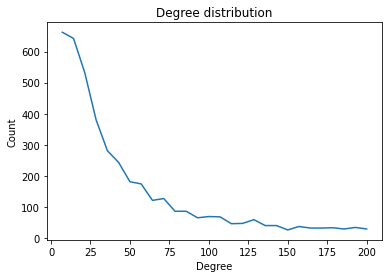

In [0]:
# Plot histogram of degree distribution
hist, bins = np.histogram(G_fb.degree, bins=np.linspace(0,200,29))
plt.plot(bins[1:],hist)
plt.xlabel("Degree")
plt.ylabel("Count")
plt.title("Degree distribution")
# Max degree
print("Maximum degree", np.max(G_fb.degree)) 

### Clustering Coefficient

Clustering coefficient can be described as a measure of the degree to which nodes in a graph tend to cluster together.

This coefficient comes from the fraction of pairs of the node's friends (that is connections) that are connected with each other. 

https://en.wikipedia.org/wiki/Clustering_coefficient

In [0]:
# Get the average clustering coefficient
print('Average Local Clustering Coefficient:', nx.average_clustering(G_fb))

Average Local Clustering Coefficient: 0.6055467186200876


### Eccentricity of the Graph

Eccentricity of the graph can be described as the length of the longest path from one node to another in the whole graph.

For the sake of simplicity, lets choose the node 1 for the example. 

This shows that once we start from the node 1, we can go to each and every node in our graph by at most 7 edges.

In [0]:
print('Eccentricity of node 1 is:', nx.eccentricity(G_fb, 1))

Eccentricity of node 1 is: 7


### Graph Density

Another metric for the analysis is the density of the graph we use.

It can be defined as the ratio of the present edges to all possible edges in a network. We can understand how closely knit our network is based on the result of this metric. We can see how this network is not really dense. It makes sense as different groups of friends do not necessarily interact with each other.

In [0]:
density = nx.density(G_fb)
print('Density of the graph is:', density)

Density of the graph is: 0.010819963503439287


### Centrality Measures

Other Important Measures to Help the Recommendation Program will be the centrality measures. These measures will usually help us find the most important nodes in our graph in terms of different aspects. Mentioned measures can be:

- **Degree Centrality:** For social networks, we normally see that people who have the most friends are the most popular or the most influential ones. This shows that important nodes will have a higher degree and hence higher degree centrality. But does it always mean that individual nodes that have the highest degree value will be the most important nodes? What if the given node is in a particular cluster and has a really high degree centrality but has no connection with other clusters? We use the betweenness centrality to check on that aspect.

- **Betweennness Centrality:** This measurement represents the frequency at which a point occurs on the shortest paths that connects a pair of nodes. To be more precise, we measure how many times a specific node occurs in a shortest path between 2 nodes. Nodes which have a higher betweenness centrality will play a significant role.  This is specially true for social graphs, since these nodes control the information flow and have the power to influence a lot of different individuals/nodes in a graph.

- **Eigenvector Centrality:** It measures not just how many individuals a specific node is connected to but also how important are connections of these specific node. It decides that a node is considered to be important if it's connections are other important nodes. 

- **Closeness Centrality:** Closeness centrality of a node is the reciprocal of the sum of the shortest path distances from that node to all other nodes in the graph. Since the sum of distances depends on the number of nodes in the graph, closeness is normalized by the sum of minimum possible distances between all nodes in the graph. A higher values of closeness indicate higher centrality

From the plotted graph we can see above, we observe that node 4015 is in a cluster and usually connected to the nodes in the same cluster but node 594 is in between 2 different clusters and hence will occur more while determining the shortest path from one node to another and will have a higher betweenness centrality


In [0]:
# To give an example about these measurements
# Note: calculating betweenness for a large graph like this takes some time as it has to calculate all the shortest paths
#       and it would need to be recalculated every time a node is added.
#       The same happens with Closeness centrality.
b_cen = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)

print('Betweenness centrality of node 4015:', b_cen[4015])
print('Betweenness centrality of node 594:', b_cen[594])

Betweenness centrality of node 4015: 0.0004951720722951225
Betweenness centrality of node 594: 0.02928410769648835


Example below shows the that having a higher degree centrality doesn't always mean that also having a higher betweenness centrality.

We see that node 871 has more connections than node 860.
But since node 860 is in between two different clusters, it will have a higher value in terms of betweenness centrality measurement.

In [0]:
d_cen = nx.degree_centrality(G_fb)

print('Degree centrality of node 871:', d_cen[871])
print('Degree centrality of node 860:', d_cen[860])

print('Betweenness centrality of node 871:', b_cen[871])
print('Betweenness centrality of node 860:', b_cen[860])

Degree centrality of node 871: 0.001733531451213472
Degree centrality of node 860: 0.0004952947003467063
Betweenness centrality of node 871: 0.0004965046304556658
Betweenness centrality of node 860: 0.058292445169069125


Finally, eigenvector centrality of node 58 will be higher since it is connected to the important nodes such as node 171 and node 3290 whereas node 464 is not connected to many important nodes.

In [0]:
e_cen = nx.eigenvector_centrality(G_fb)

print('Eigenvector centrality of node 464:', e_cen[464])
print('Eigenvector centrality of node 58:', e_cen[58])

Eigenvector centrality of node 464: 1.443062094227954e-07
Eigenvector centrality of node 58: 0.000589812015498517


We will take a look at the closeness centrality score of nodes 4015 and 594. It can be seen that node 594 is located more in the center and has a closer distance to other nodes in the graph.

In [0]:
c_cen = nx.closeness_centrality(G_fb)

print('Closeness centrality of node 4015:', c_cen[4015])
print('Closeness centrality of node 594:', c_cen[594])

Closeness centrality of node 4015: 0.1839803171131766
Closeness centrality of node 594: 0.2886966468863945


To have a better glimpse of our graph in terms of degree and betweenness centrality, we have decided to open up the color of our nodes if it has a higher degree and increase their size if they have a higher betweenness centrality.

Results can be seen in the following figure:

(-1.0770353496074676,
 0.6177423417568206,
 -0.6369937300682068,
 0.6038212418556214)

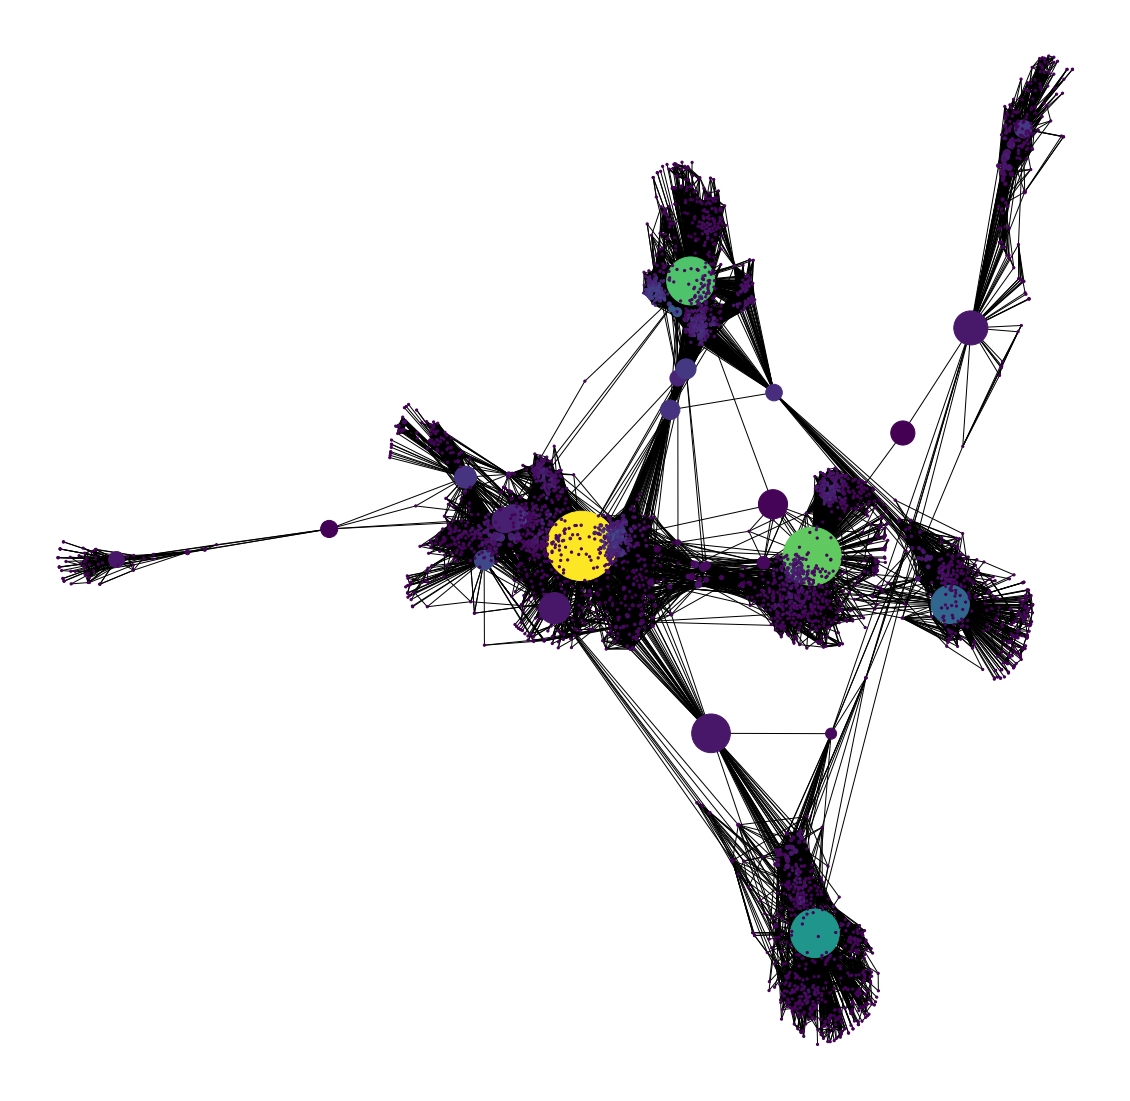

In [0]:
# Change color based on degree and size base on betweenness
pos = nx.spring_layout(G_fb)
node_color = [200000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in b_cen.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

Get the 10 biggest centrality measures for each metric

In [0]:
# Get labels of the 5 nodest with the highest betweenness
biggest_b_cen = sorted(b_cen, key=b_cen.get, reverse=True)[:10]

biggest_e_cen = sorted(e_cen, key=e_cen.get, reverse=True)[:10]

biggest_d_cen = sorted(d_cen, key=d_cen.get, reverse=True)[:10]

biggest_c_cen = sorted(c_cen, key=c_cen.get, reverse=True)[:10]

print(biggest_b_cen)
print(biggest_e_cen)
print(biggest_d_cen)
print(biggest_c_cen)

[107, 1684, 3437, 1912, 1085, 0, 698, 567, 58, 428]
[1912, 2266, 2206, 2233, 2464, 2142, 2218, 2078, 2123, 1993]
[107, 1684, 1912, 3437, 0, 2543, 2347, 1888, 1800, 1663]
[107, 58, 428, 563, 1684, 171, 348, 483, 414, 376]


Plot the **10 biggest betweenness centrality** nodes in the graph with different color

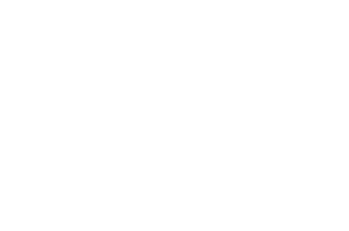

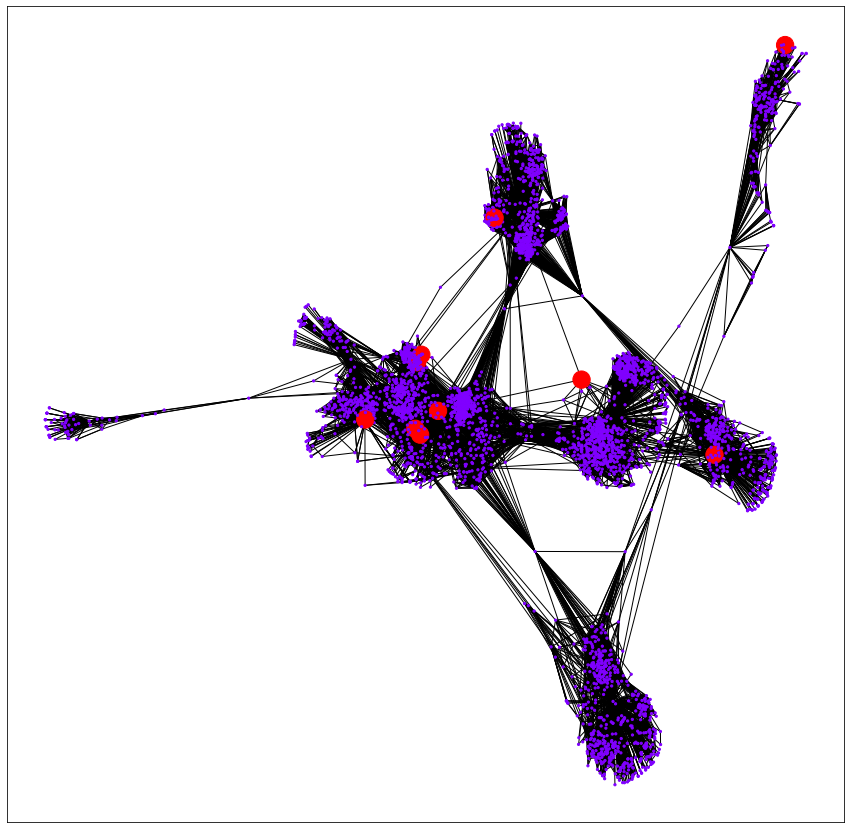

In [0]:
bt_values = [5]*len(G_fb.nodes())
bt_colors = [0]*len(G_fb.nodes())

for x in biggest_b_cen:
    bt_values[x] = 300
    bt_colors[x] = 10

plt.axis("off")
plt.figure(figsize=(15,15))

nx.draw_networkx(G_fb, pos = pos, cmap = plt.get_cmap("rainbow"), 
                 node_color = bt_colors, node_size = bt_values, with_labels = False)

Plot the **10 biggest eigenvector centrality** nodes in the graph with different color

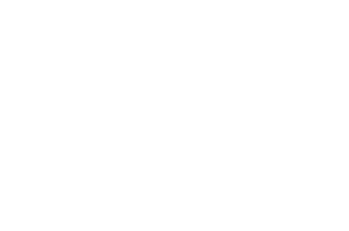

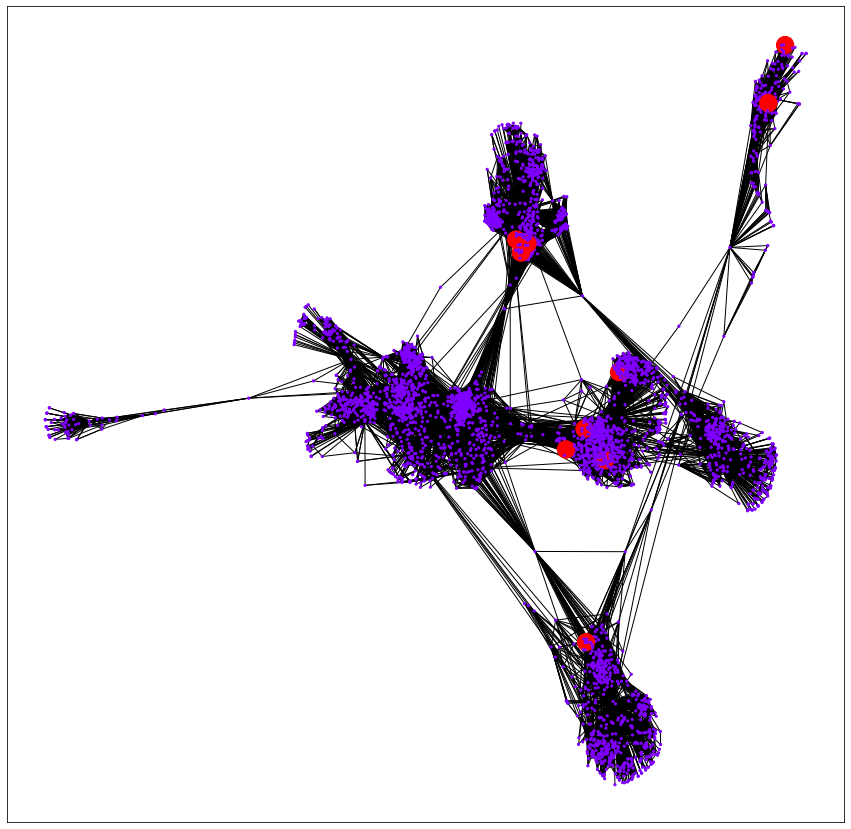

In [0]:
bt_values = [5]*len(G_fb.nodes())
bt_colors = [0]*len(G_fb.nodes())

for x in biggest_e_cen:
    bt_values[x] = 300
    bt_colors[x] = 10

plt.axis("off")
plt.figure(figsize=(15,15))

nx.draw_networkx(G_fb, pos = pos, cmap = plt.get_cmap("rainbow"), 
                 node_color = bt_colors, node_size = bt_values, with_labels = False)

Plot the **10 biggest degree centrality** nodes in the graph with different color

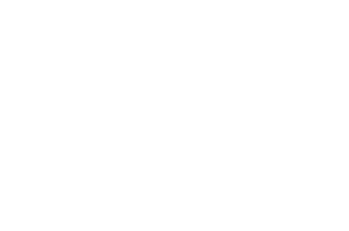

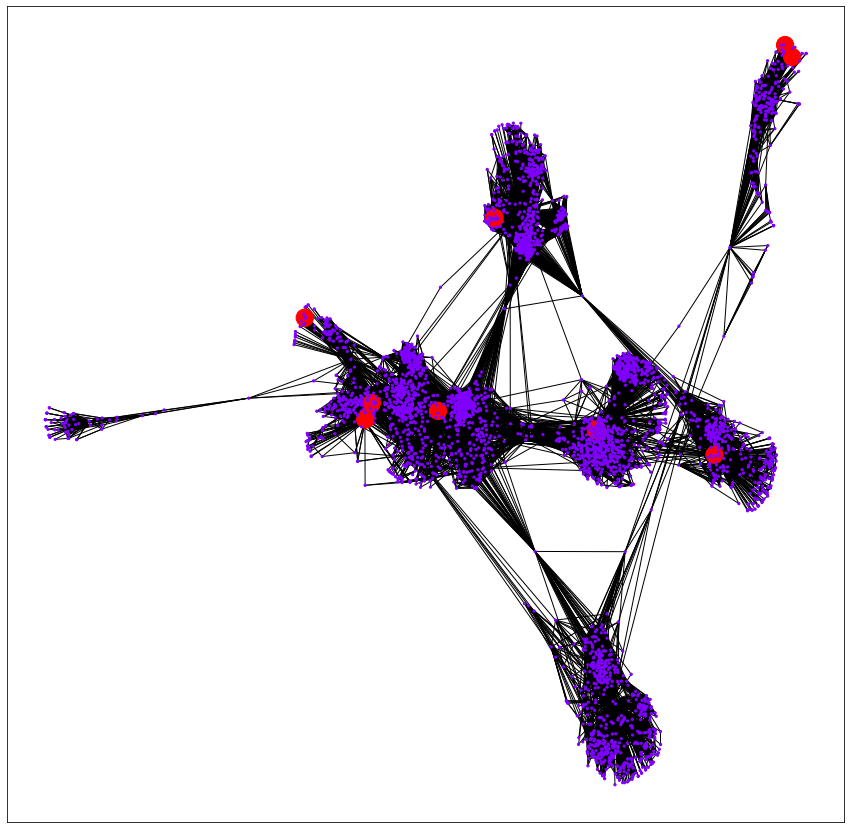

In [0]:
bt_values = [5]*len(G_fb.nodes())
bt_colors = [0]*len(G_fb.nodes())

for x in biggest_d_cen:
    bt_values[x] = 300
    bt_colors[x] = 10

plt.axis("off")
plt.figure(figsize=(15,15))

nx.draw_networkx(G_fb, pos = pos, cmap = plt.get_cmap("rainbow"), 
                 node_color = bt_colors, node_size = bt_values, with_labels = False)

Plot the **10 biggest closeness centrality** nodes in the graph with different color

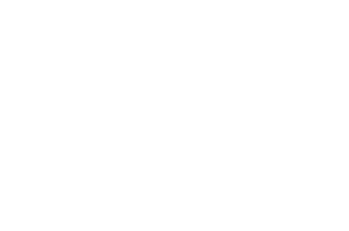

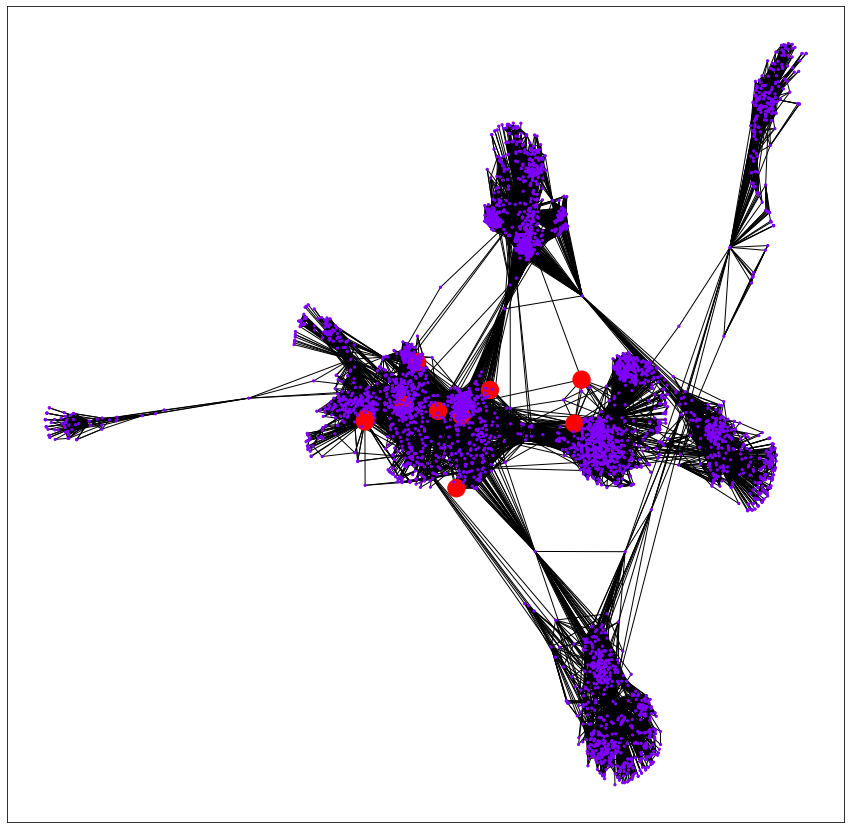

In [0]:
bt_values = [5]*len(G_fb.nodes())
bt_colors = [0]*len(G_fb.nodes())

for x in biggest_c_cen:
    bt_values[x] = 300
    bt_colors[x] = 10

plt.axis("off")
plt.figure(figsize=(15,15))

nx.draw_networkx(G_fb, pos = pos, cmap = plt.get_cmap("rainbow"), 
                 node_color = bt_colors, node_size = bt_values, with_labels = False)

## Community Detection Using Louvain Algorithm

In this part, we used the Louvain community detection algorithm to categorize the nodes in our graph. To use it on the recommendation algorithm, we can give different options to the user whether the recommendations should be from the same community or a totally different community.

The inspiration for this method of community detection is the optimization of modularity as the algorithm progresses. It measures the density of the links inside the communities compared to links between communities.

Sources:
- https://arxiv.org/abs/0803.0476
- https://perso.crans.org/aynaud/communities/

Using this algorithm to detect communities, we can use this new information to fine-tune the recommendation offered to the user, thus improving their quality, and the probability that the user is interested in these new connections. Several options can be shown to the user.

The community graph extracted by this algorithm can be seen below:

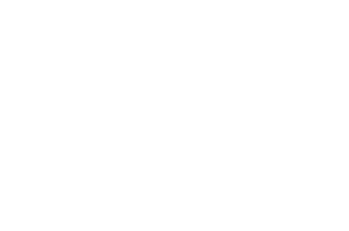

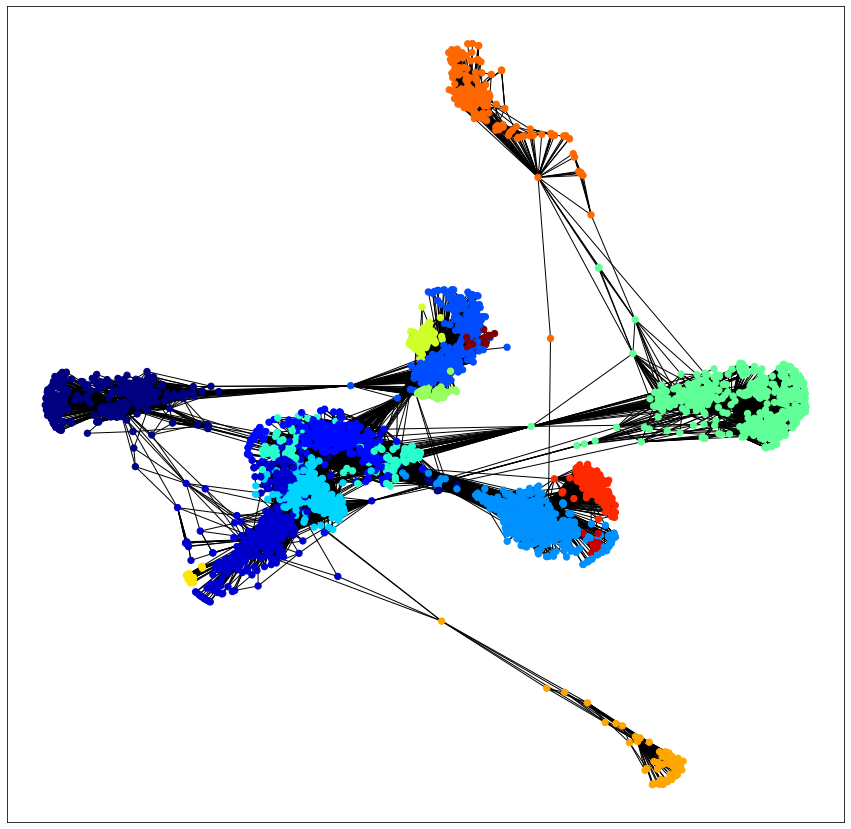

In [0]:
# Get the community partition
partition = community.best_partition(G_fb)
# Parse the different ids in order to give a different color to each community
community_ids = [partition.get(node) for node in G_fb.nodes()]
# Plot the network
pos = nx.spring_layout(G_fb)
plt.axis("off")
plt.figure(figsize=(15,15))
nx.draw_networkx(G_fb, pos = pos, cmap = plt.get_cmap("jet"), 
                 node_color = community_ids, node_size = 40, with_labels = False)

We can see that 16 communities are detected by the algorithm. Some of them contain a large number of nodes, but others have just a dozen of members. This shows the advantage of the Louvain method when detecting small categories as opposed to to others algorithms, which tend to absorb these small communities into the bigger ones.

In [0]:
# Show the number of detected communities
size = float(len(set(partition.values())))
print("Number of detected communities: ", int(size))

Number of detected communities:  16


We can use these different communities to improve the recommendation algorithm.

The list of nodes per community can be seen below:

In [0]:
# Group nodes by community
community_nodes = []
for com in set(partition.values()) :
    l = [nodes for nodes in partition.keys() if partition[nodes] == com]
    community_nodes.append(l)

# Show list of nodes per community
for x in range(len(community_nodes)):
  print('Nodes in community', x, 'are:', community_nodes[x])

Nodes in community 0 are: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 22

### Extracting the Clustering Coefficient of Individual Communities

In [0]:
cluster_coeffs = []

for comm_id in range(len(community_nodes)):
  val = nx.average_clustering(G_fb,nodes=community_nodes[comm_id])
  print('Clustering coefficient for community',comm_id,'is:',val)
  cluster_coeffs.append(val)

Clustering coefficient for community 0 is: 0.6569258881202089
Clustering coefficient for community 1 is: 0.5850091329119363
Clustering coefficient for community 2 is: 0.5629026590513013
Clustering coefficient for community 3 is: 0.5981108344198267
Clustering coefficient for community 4 is: 0.5097142256089409
Clustering coefficient for community 5 is: 0.5752354906046997
Clustering coefficient for community 6 is: 0.6675544179174769
Clustering coefficient for community 7 is: 0.623378786079584
Clustering coefficient for community 8 is: 0.6762443446032415
Clustering coefficient for community 9 is: 0.7641355469761197
Clustering coefficient for community 10 is: 0.9064369578164165
Clustering coefficient for community 11 is: 0.6477515478076048
Clustering coefficient for community 12 is: 0.6342840665022283
Clustering coefficient for community 13 is: 0.5595516886789027
Clustering coefficient for community 14 is: 0.8688803103908205
Clustering coefficient for community 15 is: 0.7389610886413956


### Global Modularity

It is also possible to extract global modularity, which can be seen as a measure of the structure of graphs. It measures the strength of division of a network into modules. Networks with high modularity have dense connections within the modules but sparse connections between nodes in different modules.

Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1482622/

In [0]:
global_modularity = community.modularity(partition, G_fb)
print(global_modularity)

0.8349745079417317


The modularity of the network is quite high, which implies dense intra-module connections.

## Recommendation algorithm

Our recommendation algorithm is formed by three different functions. These are:

- **get_neighbors:** Returns the friends of the selected node in a list.
- **possible_recommendations:** Returns the possible recommendations for the selected node that are not selected node's friends and not the selected node itself.
- **count_mutual_friends:** For every recommendation, counts the number of mutual friends with selected node in a list form.

In [0]:
# Get all the neighbors of a node
def get_neighbors(graph, node_id):

  neighbors = []
  for node in graph[node_id]:
    neighbors.append(node)

  return neighbors

# Returnds a list of ids containing "friends of friends" who are not already part of the user's friend list
def possible_recommendations(graph, node_id):

  neighbors = get_neighbors(graph, node_id)
  recommendations = []

  for neighbor in neighbors: # For each friend of selected node
    fr_of_fr = get_neighbors(graph, neighbor) # Short notation for friends of friends

    for rec in fr_of_fr:  # For each friend of selected node's friends

      if rec not in neighbors and rec != node_id and rec not in recommendations:  # If node is not in selected node's friends
        recommendations.append(rec)                                               # and not the selected node itself and 
                                                                                  # not added in recommendations before
  return recommendations


# Counts the number of mutual friends with the given node for each recommendation
def count_mutual_friends(graph, recommendations, node_id): 

  neighbors = get_neighbors(graph, node_id) # Get the neighbors of the selected node
  mutual_count = []
  for rec in recommendations: # For each recommendation
    ct = 0
    rec_friends = get_neighbors(graph, rec)  # Get the friend list of the recommendation
    for x in rec_friends: # For each friend of recommendation
      if x in neighbors: # Increase the count by 1 if this node is also in friend list of selected node
        ct += 1
    mutual_count.append(ct)

  return mutual_count


In [0]:
test_node_id = 800
# Get possible recommendations for a specific node
recommendations = possible_recommendations(G_fb, test_node_id)

# Get mutual friends count
counts = count_mutual_friends(G_fb, recommendations, test_node_id)

recs = []
for i in range(800):
  recommendations = possible_recommendations(G_fb, i)
  recs.append(len(recommendations))
print("Average number of possible recommendations: ", np.mean(np.array(recs)))

Average number of possible recommendations:  327.58375


To start with the actual recommendation algorithm, first we need to extract every important metric we obtained for the possible recommendation nodes.

To do that, we first use different metric dictionaries by using possible recommendation nodes as keys.

**For mutual friends**

In [0]:
mutual_dct = {}
for i in range(len(recommendations)):
  # Mutual friends
  mutual_dct[recommendations[i]] = counts[i]

print(mutual_dct)

{687: 10, 688: 1, 689: 5, 690: 1, 691: 1, 692: 7, 693: 18, 694: 19, 695: 1, 696: 3, 697: 12, 698: 1, 699: 14, 700: 1, 701: 13, 702: 1, 703: 6, 706: 5, 707: 11, 708: 1, 709: 1, 710: 9, 711: 3, 712: 1, 713: 12, 714: 6, 715: 3, 717: 8, 718: 7, 720: 23, 721: 1, 722: 20, 723: 11, 724: 3, 725: 3, 726: 19, 727: 1, 728: 2, 729: 10, 730: 2, 731: 8, 732: 13, 733: 8, 734: 2, 735: 2, 736: 1, 737: 1, 738: 2, 739: 6, 740: 1, 741: 1, 742: 8, 743: 8, 744: 10, 746: 9, 747: 7, 748: 1, 749: 7, 750: 6, 751: 11, 752: 4, 753: 9, 754: 5, 755: 1, 756: 2, 757: 10, 758: 3, 759: 18, 760: 1, 761: 2, 763: 5, 764: 6, 765: 3, 766: 14, 767: 2, 768: 4, 769: 1, 771: 1, 772: 9, 773: 1, 774: 1, 775: 2, 776: 1, 777: 7, 778: 3, 779: 8, 780: 6, 781: 1, 782: 5, 783: 4, 784: 6, 785: 1, 786: 1, 787: 4, 788: 4, 789: 1, 790: 9, 791: 2, 792: 5, 793: 3, 794: 4, 795: 20, 796: 2, 797: 9, 798: 4, 800: 18, 801: 18, 802: 3, 803: 1, 804: 24, 805: 3, 806: 6, 807: 16, 808: 8, 809: 1, 810: 2, 811: 6, 812: 5, 815: 4, 816: 7, 817: 1, 818: 14

**For recommendations and their communities:**

In [0]:
community_dct = {}

for recommendation in recommendations:
  for i in range(len(community_nodes)):
    if recommendation in community_nodes[i]:
      community_dct[recommendation] = i

print(community_dct)

{687: 12, 688: 12, 689: 12, 690: 12, 691: 12, 692: 12, 693: 12, 694: 12, 695: 12, 696: 12, 697: 12, 698: 12, 699: 12, 700: 12, 701: 12, 702: 12, 703: 12, 706: 12, 707: 12, 708: 12, 709: 12, 710: 12, 711: 12, 712: 12, 713: 12, 714: 12, 715: 12, 717: 12, 718: 12, 720: 12, 721: 12, 722: 12, 723: 12, 724: 12, 725: 12, 726: 12, 727: 12, 728: 12, 729: 12, 730: 12, 731: 12, 732: 12, 733: 12, 734: 12, 735: 12, 736: 12, 737: 12, 738: 12, 739: 12, 740: 12, 741: 12, 742: 12, 743: 12, 744: 12, 746: 12, 747: 12, 748: 12, 749: 12, 750: 12, 751: 12, 752: 12, 753: 12, 754: 12, 755: 12, 756: 12, 757: 12, 758: 12, 759: 12, 760: 12, 761: 12, 763: 12, 764: 12, 765: 12, 766: 12, 767: 12, 768: 12, 769: 12, 771: 12, 772: 12, 773: 12, 774: 12, 775: 12, 776: 12, 777: 12, 778: 12, 779: 12, 780: 12, 781: 12, 782: 12, 783: 12, 784: 12, 785: 12, 786: 12, 787: 12, 788: 12, 789: 12, 790: 12, 791: 12, 792: 12, 793: 12, 794: 12, 795: 12, 796: 12, 797: 12, 798: 12, 800: 12, 801: 12, 802: 12, 803: 12, 804: 12, 805: 12, 

**For betweenness centrality of the recommendations:**

In [0]:
betweenness_dct = {}

for recommendation in recommendations:
  betweenness_dct[recommendation] = b_cen[recommendation]

print(betweenness_dct)

{687: 0.0004988981655905929, 688: 0.0005089073908874744, 689: 0.0004952549922157172, 690: 0.0004952195987854758, 691: 0.0004954616107502508, 692: 0.0004951720722951225, 693: 0.0004955169507667807, 694: 0.0005099365152647629, 695: 0.0005010683381331473, 696: 0.000497294908245071, 697: 0.0024587946468300945, 698: 0.1157685138598761, 699: 0.0004951720722951225, 700: 0.0004952293294530423, 701: 0.0004963960053993554, 702: 0.0004952594204509133, 703: 0.002773935290353971, 706: 0.0004952160753499936, 707: 0.0004957038984759792, 708: 0.0011060696469658402, 709: 0.0004956662332955612, 710: 0.0004953542665066045, 711: 0.0004958995105739332, 712: 0.0004964686206309944, 713: 0.005506824583433473, 714: 0.0004962023912380521, 715: 0.0004951982638607619, 717: 0.0004951720722951225, 718: 0.0004989731480533504, 720: 0.0004975181687276834, 721: 0.0004952366878453801, 722: 0.0004957818777906758, 723: 0.000495380355163617, 724: 0.0005070094064706103, 725: 0.0004952246271743726, 726: 0.0004984401787374661

**For degree centrality of the recommendations:**

In [0]:
degree_dct = {}

for recommendation in recommendations:
  degree_dct[recommendation] = d_cen[recommendation]
  
print(degree_dct)

{687: 0.006934125804853888, 688: 0.01114413075780089, 689: 0.001981178801386825, 690: 0.002228826151560178, 691: 0.0014858841010401188, 692: 0.00024764735017335313, 693: 0.003467062902426944, 694: 0.01337295690936107, 695: 0.010153541357107478, 696: 0.007677067855373947, 697: 0.012877662209014363, 698: 0.016840019811788013, 699: 0.0004952947003467063, 700: 0.001733531451213472, 701: 0.005200594353640416, 702: 0.001981178801386825, 703: 0.010648836057454186, 706: 0.004457652303120356, 707: 0.0024764735017335313, 708: 0.007181773155027241, 709: 0.004210004952947003, 710: 0.001981178801386825, 711: 0.004952947003467063, 712: 0.0032194155522535907, 713: 0.017582961862308073, 714: 0.003467062902426944, 715: 0.0024764735017335313, 717: 0.0009905894006934125, 718: 0.007429420505200594, 720: 0.004457652303120356, 721: 0.0012382367508667657, 722: 0.003467062902426944, 723: 0.0029717682020802376, 724: 0.011639425458147598, 725: 0.001981178801386825, 726: 0.008915304606240713, 727: 0.006438831104

**For eigenvector centrality of the recommendations:**

In [0]:
eigen_dct = {}

for recommendation in recommendations:
  eigen_dct[recommendation] = e_cen[recommendation]

print(eigen_dct)

{687: 7.184894171202438e-13, 688: 1.0073501649505596e-12, 689: 6.740845568369823e-14, 690: 1.563071981740791e-13, 691: 6.807532903627439e-14, 692: 6.385265348738539e-14, 693: 3.4232798882831587e-13, 694: 1.0339588894800468e-12, 695: 6.636042512848423e-13, 696: 7.963305961311273e-13, 697: 8.678627834488076e-12, 698: 1.1168762919222951e-09, 699: 6.477107636858494e-14, 700: 1.3927463978343084e-13, 701: 4.241896845004356e-13, 702: 6.732812896952983e-14, 703: 8.146091114589031e-12, 706: 4.751114269198391e-13, 707: 7.086240972556605e-14, 708: 8.569921547306728e-12, 709: 5.625818471070317e-13, 710: 2.5056267658303944e-13, 711: 3.033467500422203e-13, 712: 7.235171067127648e-14, 713: 8.611080553579484e-12, 714: 7.156697094706808e-14, 715: 2.1904474597367634e-13, 717: 1.1718843787558731e-13, 718: 6.084223095015953e-13, 720: 3.309399380539647e-13, 721: 1.8669865015439069e-13, 722: 2.801942140654151e-13, 723: 2.7235785341432443e-13, 724: 7.984438365254066e-13, 725: 6.862405137580093e-14, 726: 6.62

**For closeness centrality of the recommendations:**

In [0]:
close_dct = {}

for recommendation in recommendations:
  close_dct[recommendation] = c_cen[recommendation]

print(close_dct)

{687: 0.17856195277261874, 688: 0.178696287117759, 689: 0.17830963525567428, 690: 0.17831750938396998, 691: 0.17829388908512894, 692: 0.1782545358230698, 693: 0.17837264776040287, 694: 0.178696287117759, 695: 0.17858564415549955, 696: 0.17851458885941646, 697: 0.21554393082096723, 698: 0.27118871725990595, 699: 0.17826240508564364, 700: 0.17830176182275798, 701: 0.1784357048166151, 702: 0.17830963525567428, 703: 0.2154404310942752, 706: 0.17839628893306825, 707: 0.17832538420773714, 708: 0.21527962893852962, 709: 0.17839628893306825, 710: 0.17831750938396998, 711: 0.17841205319665973, 712: 0.1783490128527892, 713: 0.21576275714667378, 714: 0.17835689045936395, 715: 0.17833325972706796, 717: 0.17827814569536424, 718: 0.17849091632409494, 720: 0.178404170716621, 721: 0.17829388908512894, 722: 0.17835689045936395, 723: 0.1783490128527892, 724: 0.17864094850468942, 725: 0.17830963525567428, 726: 0.17854616200919704, 727: 0.1784672500662954, 728: 0.17863304578633046, 729: 0.2150961487242316

**For cluster coefficients of the different communities:**

In [0]:
cluster_coeff_dct = {}
cluster_coeff_normalized = {}

for comm_num in range(len(community_nodes)):
  cluster_coeff_dct[comm_num] = cluster_coeffs[comm_num]

print(cluster_coeff_dct)

{0: 0.6569258881202089, 1: 0.5850091329119363, 2: 0.5629026590513013, 3: 0.5981108344198267, 4: 0.5097142256089409, 5: 0.5752354906046997, 6: 0.6675544179174769, 7: 0.623378786079584, 8: 0.6762443446032415, 9: 0.7641355469761197, 10: 0.9064369578164165, 11: 0.6477515478076048, 12: 0.6342840665022283, 13: 0.5595516886789027, 14: 0.8688803103908205, 15: 0.7389610886413956}


In [0]:
# Build metrics for a specific node
def parse_metrics(node_id):
  metrics = {}

  metrics["n_mutual_friends"] = mutual_dct[node_id]
  metrics["community_id"] = community_dct[node_id]
  metrics["betweenness"] = betweenness_dct[node_id]
  metrics["degree"] = degree_dct[node_id]
  metrics["eigen"] = eigen_dct[node_id]
  metrics["closeness"] = close_dct[node_id]
  metrics["cluster_coeff"] = cluster_coeff_dct[community_dct[node_id]]

  return metrics

# Get all the possible recommendation metrics
all_metrics = {}
for recommendation in recommendations:
  metrics = parse_metrics(recommendation)
  all_metrics[recommendation] = metrics

print(all_metrics)

{687: {'n_mutual_friends': 10, 'community_id': 12, 'betweenness': 0.0004988981655905929, 'degree': 0.006934125804853888, 'eigen': 7.184894171202438e-13, 'closeness': 0.17856195277261874, 'cluster_coeff': 0.6342840665022283}, 688: {'n_mutual_friends': 1, 'community_id': 12, 'betweenness': 0.0005089073908874744, 'degree': 0.01114413075780089, 'eigen': 1.0073501649505596e-12, 'closeness': 0.178696287117759, 'cluster_coeff': 0.6342840665022283}, 689: {'n_mutual_friends': 5, 'community_id': 12, 'betweenness': 0.0004952549922157172, 'degree': 0.001981178801386825, 'eigen': 6.740845568369823e-14, 'closeness': 0.17830963525567428, 'cluster_coeff': 0.6342840665022283}, 690: {'n_mutual_friends': 1, 'community_id': 12, 'betweenness': 0.0004952195987854758, 'degree': 0.002228826151560178, 'eigen': 1.563071981740791e-13, 'closeness': 0.17831750938396998, 'cluster_coeff': 0.6342840665022283}, 691: {'n_mutual_friends': 1, 'community_id': 12, 'betweenness': 0.0004954616107502508, 'degree': 0.001485884

As a result we have the following data structure for possible recommendation nodes:

```
node_id{
  n_mutual_friends,
  community_id,
  betweenness,
  degree,
  eigen,
  closeness,
  cluster_coeff,
}
```




Finally, the actual recommendations are generated by the algorithm by taking into account all the obtained metrics.

In [0]:
# Filter recommendations based on the chosen top priority
def filter_recommendations(possible_recommendations, metrics, community_id, priority):
  if priority == "community":
    # Delete if not in the same community
    for recommendation in possible_recommendations:
      if metrics[recommendation]["community_id"] != community_id:
        possible_recommendations.remove(recommendation)
  elif priority == "degree":
    # Delete if small degree
    avg_degree = np.mean([i[1] for i in G_fb.degree])
    for recommendation in possible_recommendations:
      if G_fb.degree[recommendation] < avg_degree:
        possible_recommendations.remove(recommendation)
  else:
    # Delete if low clustering coefficient
    for recommendation in possible_recommendations:
      if metrics[recommendation]["cluster_coeff"] < 0.5:
        possible_recommendations.remove(recommendation)

  return possible_recommendations


def calculate_recommendation_score(recommendation, rec_metrics, community, exhaustive):
  # The algorithm takes into account the following metrics 
  #   Number of mutual friends
  #   Eigen centrality normalized
  #   Closeness centrality normalized
  #   Betweenness centrality normalized
  #   Degree centrality normalized
  #   Community ID
  score = rec_metrics["n_mutual_friends"] * rec_metrics["eigen"] * rec_metrics["degree"]

  if exhaustive:
    score *= rec_metrics["closeness"] * rec_metrics["betweenness"]
  
  # Score penalization if different community, but some recommendations from other communities can occur
  if rec_metrics["community_id"] != community:
    score *= 0.5

  return score


def generate_recommendations(test_node_id, possible_recommendations, metrics, priority="community", exhaustive=False, n_rec=10):
  """Generate recommendations for a given node
    
    Arguments:
        test_node_id[int]: id of the node of interest
        possible_recommendations[list]: ids of possible recommendations
        metrics[dict]: metrics of all the possible recommendations
        priority[str]: priority flag
        n_rec[int]: number of recommendations to generate
        
    Returns:
        recommendations[list]: ids of the calculated recommendations
    """
  recommendations = []

  # Get community of user of interest
  community_id = 0
  for i in range(len(community_nodes)):
    if test_node_id in community_nodes[i]:
      community_id = i
      break

  # Filter recommendations based on flag
  possible_recommendations = filter_recommendations(possible_recommendations, metrics, community_id, priority)

  # Calculate friend score
  scores = {}
  for recommendation in possible_recommendations:
    score = calculate_recommendation_score(recommendation, metrics[recommendation], community_id, exhaustive)
    scores[recommendation] = score

  # Sort by score in descending order
  sort_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)

  # Get the desired number of recommendations
  recommendations = []
  if len(sort_scores) >= n_rec:
    recommendations = sort_scores[0:n_rec]
  else:
    recommendations = sort_scores

  # Return only the indices of the recommendations, not the score
  scores = [i[1] for i in recommendations]
  print(scores)
  recommendations = [i[0] for i in recommendations]
  print(recommendations)
  
  return recommendations


generate_recommendations(800, 
                         recommendations, 
                         all_metrics,
                         priority="community",
                         exhaustive=True,
                         n_rec=10)


[5.904861905117381e-13, 2.1587813513323834e-15, 9.970882486884358e-16, 7.107672320183858e-16, 6.068999258008286e-16, 5.012925449594801e-16, 4.754383286376202e-16, 3.5942256286074546e-16, 3.2522121136850827e-16, 3.1104712384724626e-16]
[698, 713, 823, 697, 747, 828, 800, 830, 805, 703]


[698, 713, 823, 697, 747, 828, 800, 830, 805, 703]